In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Display numbers not in scientific notation:
pd.options.display.float_format = '{:.2f}'.format


# 1.0 EDA on customer dataset

In [2]:
# Read in the customer data csv:
df_cust = pd.read_csv('../data/customers.csv')

In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [4]:
# 'FN' and 'Active' are either 1 or missing value.
# Fill NaNs with zeros:

df_cust.FN.fillna(value=0, inplace=True)
df_cust.Active.fillna(value=0, inplace=True)
df_cust.age.fillna(df_cust.age.mean(), inplace=True)
df_cust.age = df_cust.age.astype('int')

In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1371980 non-null  int64  
 6   postal_code             1371980 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [10]:
df_cust.describe()

,FN,Active,age
count,1371980.00,1371980.00,1356119.00
mean,0.35,0.34,36.39
std,0.48,0.47,14.31
min,0.00,0.00,16.00
25%,0.00,0.00,24.00
50%,0.00,0.00,32.00
75%,1.00,1.00,49.00
max,1.00,1.00,99.00


In [11]:
# Count club member status:
df_cust.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

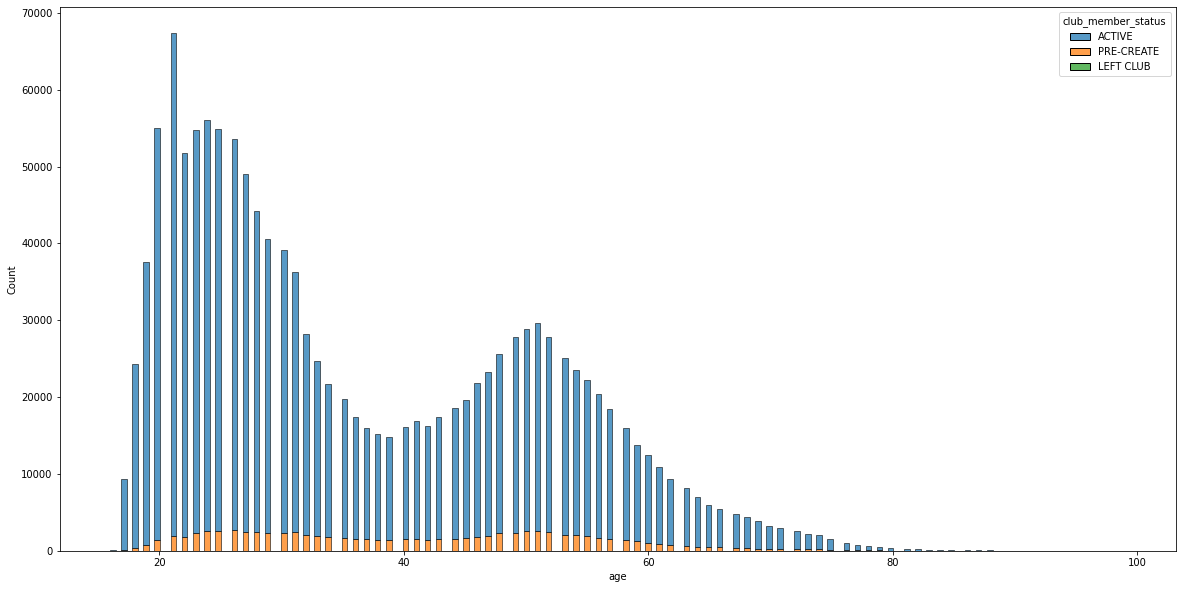

In [19]:
# Plot age and club member status
fig = plt.figure(figsize=(20, 10))
sns.histplot(x='age', hue='club_member_status', data=df_cust, multiple="stack")

<AxesSubplot:xlabel='age', ylabel='Count'>

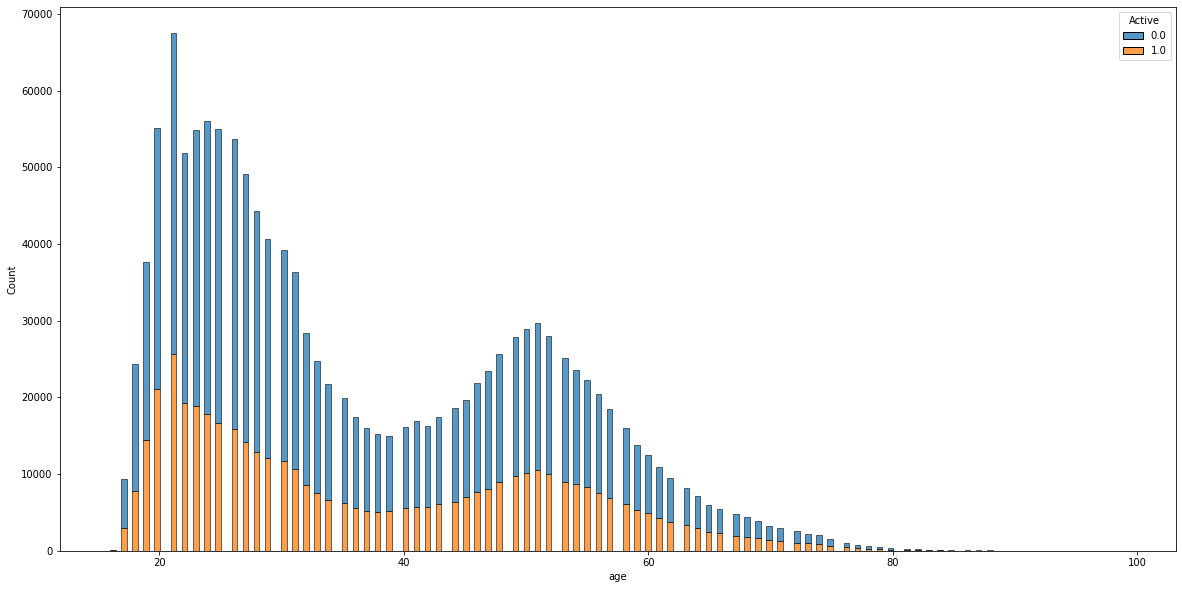

In [21]:
# Plot age and "Active"-column (active for communication):

fig = plt.figure(figsize=(20, 10))
sns.histplot(x='age', hue='Active', data=df_cust, multiple="stack")

<AxesSubplot:xlabel='Active', ylabel='count'>

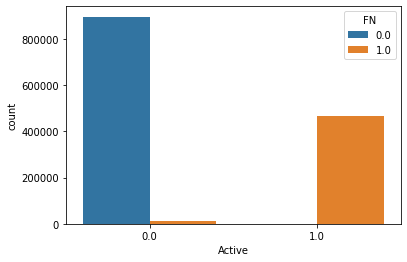

In [14]:
sns.countplot(x="Active", hue="FN", data=df_cust)

In [15]:
pd.crosstab(df_cust.FN, df_cust.Active)

Active,0.00,1.00
FN,,
0.00,895050,0
1.00,12526,464404


<AxesSubplot:xlabel='club_member_status', ylabel='count'>

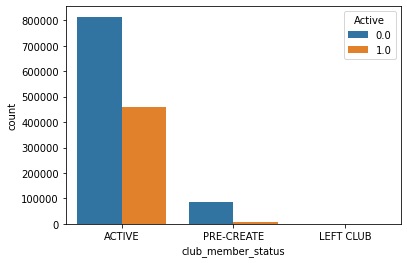

In [16]:
sns.countplot(x="club_member_status", hue="Active", data=df_cust)

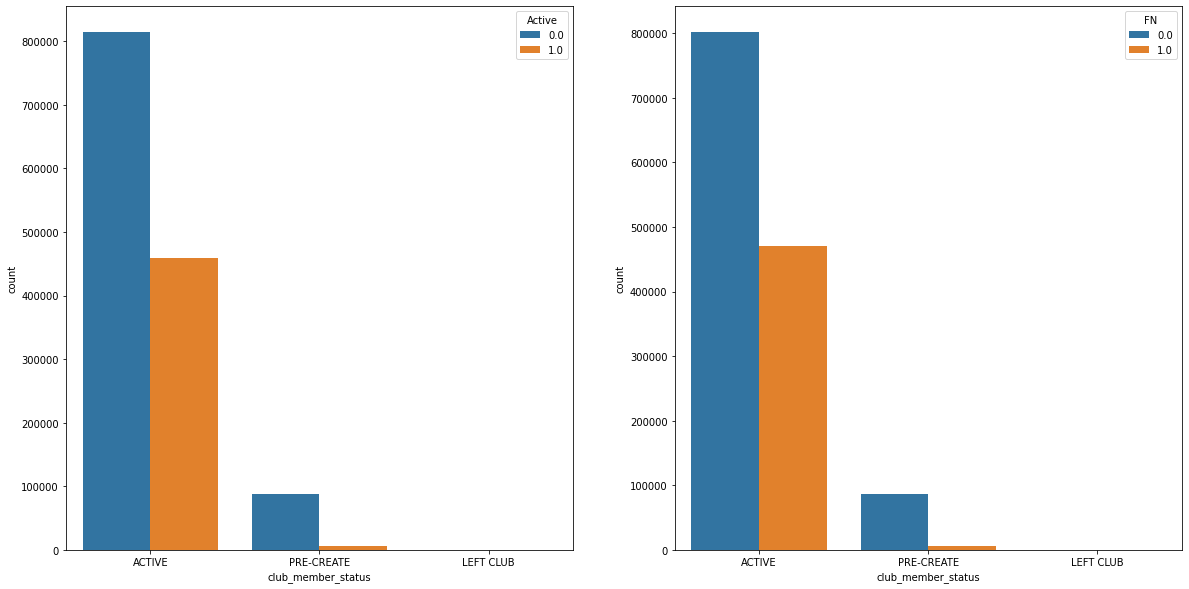

In [17]:
fig, ax =plt.subplots(1,2, figsize=(20, 10))
sns.countplot('club_member_status', hue='Active', data=df_cust, ax=ax[0])
sns.countplot('club_member_status', hue='FN', data=df_cust, ax=ax[1])
fig.show()

plt.show()

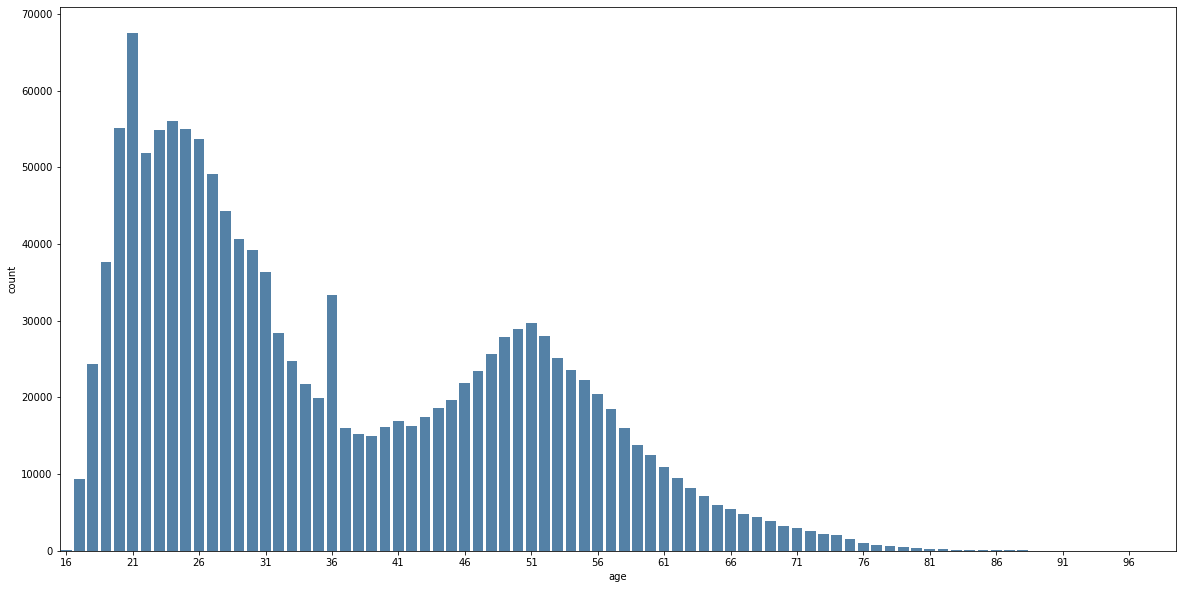

In [62]:
# Plot age counts:

plt.figure(figsize=(20, 10))

ax = sns.countplot(x="age", data=df_cust, color="steelblue")
# Print only every 5th xtick:
new_ticks = [i.get_text() for i in ax.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])

plt.show()

# 2.0 EDA on transaction dataset

In [6]:
# Read in the transaction data csv:

df_trans = pd.read_csv('../data/transactions_train.csv', dtype={'article_id':'string'})

In [45]:
df_trans[df_trans['price'] > 0.48]

,t_dat,customer_id,article_id,price,sales_channel_id
47073,2018-09-20,f94f4026ecb4080ecbd8bbfddd18e19d88f222ef864ddf...,0685973001,0.51,2
69300,2018-09-21,6f203478c5afc5c097cc9abbb8c2c54b0bde8293606227...,0697511001,0.59,2
107617,2018-09-22,a728b385ebbb4b2da7b5f5d4d945e411117462ac413c44...,0697511001,0.59,2
186506,2018-09-24,71ccfc88e84b2fe24572109aa3f30a0c8dd2c3f6de2464...,0670485001,0.51,2
187622,2018-09-24,78328d9276a5ee7c672df6f4215ed38e4f5e7e27ce2f09...,0670485001,0.51,2
...,...,...,...,...,...
31213747,2020-09-06,df429cd26175cc4a057d0d8f902fb69ea27bf7eebf2444...,0916300002,0.51,2
31315216,2020-09-09,880bf5be3464add6014fa30bbaa2269b093b5814346a69...,0916300002,0.51,2
31406693,2020-09-11,daca67cda9774df827fcd2f88db4246a9315111803bc84...,0916300002,0.51,2
31701502,2020-09-20,4e92cdcb3d486347b539906c68b54fc3d780f40db5188f...,0916300002,0.51,2


In [40]:
df_trans.describe()

,price,sales_channel_id
count,31788324.00,31788324.00
mean,0.03,1.70
std,0.02,0.46
min,0.00,1.00
25%,0.02,1.00
50%,0.03,2.00
75%,0.03,2.00
max,0.59,2.00


In [8]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        string 
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 1.2+ GB


In [9]:
# Create dataframe with turnover per customer via groupby() and sum():
df_tu_cust = df_trans.groupby('customer_id').sum().reset_index()
# Rename price column:
df_tu_cust.rename(columns={"price": "turnover"}, inplace=True)
# Drop not necessary columns:
df_tu_cust.drop(columns=['sales_channel_id'], inplace=True)

# Check the first rows:
df_tu_cust.head()



,customer_id,turnover
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.65
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.60
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.70
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.06
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.47


In [10]:
# Create dataframe which counts number of purchased articles per customer (spc = sales per customer):
df_spc = df_trans.customer_id.value_counts().reset_index()
# Rename the columns:
df_spc.rename(columns={"index": "customer_id", "customer_id": "sales_count"}, inplace=True)

# Check the first rows:
df_spc.head()



,customer_id,sales_count
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237


In [11]:
# Create dataframe which contains the turnover and number of purchased articles per customer ID:
df_sales_cust = pd.merge(df_tu_cust, df_spc, on="customer_id")

# Check the first rows:
df_sales_cust.head()


,customer_id,turnover,sales_count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.65,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.60,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.70,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.06,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.47,13


In [12]:
# Sort dataframe by number of sales:
df_sales_cust.sort_values('sales_count', ascending=False).head()

,customer_id,turnover,sales_count
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.68,1895
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.66,1441
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,30.13,1364
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.92,1361
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,41.33,1237


#### RESULT

* 20 customers ordered more than 1000 articles in 2 years (2018-2020) --> Hypothesis: Are these resellers?

<AxesSubplot:xlabel='turnover', ylabel='sales_count'>

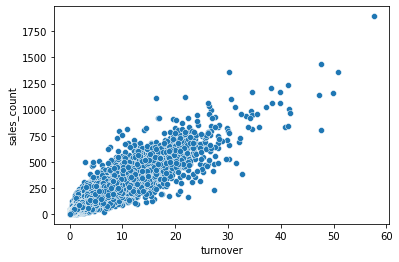

In [13]:
# Plot turnover vs purchased articles:
sns.scatterplot(x='turnover', y='sales_count', data=df_sales_cust)

In [14]:
# Create dataframe which includes customer basic data with turnover data:
df_cust_master = pd.merge(df_cust, df_sales_cust, on="customer_id")


In [15]:
df_cust_master.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,turnover,sales_count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.00,0.00,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.65,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.00,0.00,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.60,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.00,0.00,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.70,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.00,0.00,ACTIVE,NONE,54,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.06,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.00,1.00,ACTIVE,Regularly,52,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.47,13


In [16]:
sales_count = df_cust_master[df_cust_master['sales_count'] <100].shape[0]
sales_count / len(df_cust_master)

0.9579631515083893

In [17]:
# Set color palette
colors = ["#CC071E", "#ED3511", "#FF711F", "#FF9812", "#FFC22B", "#FFC42B", "#FFF233"]
custom_palette = sns.set_palette(sns.color_palette(colors))

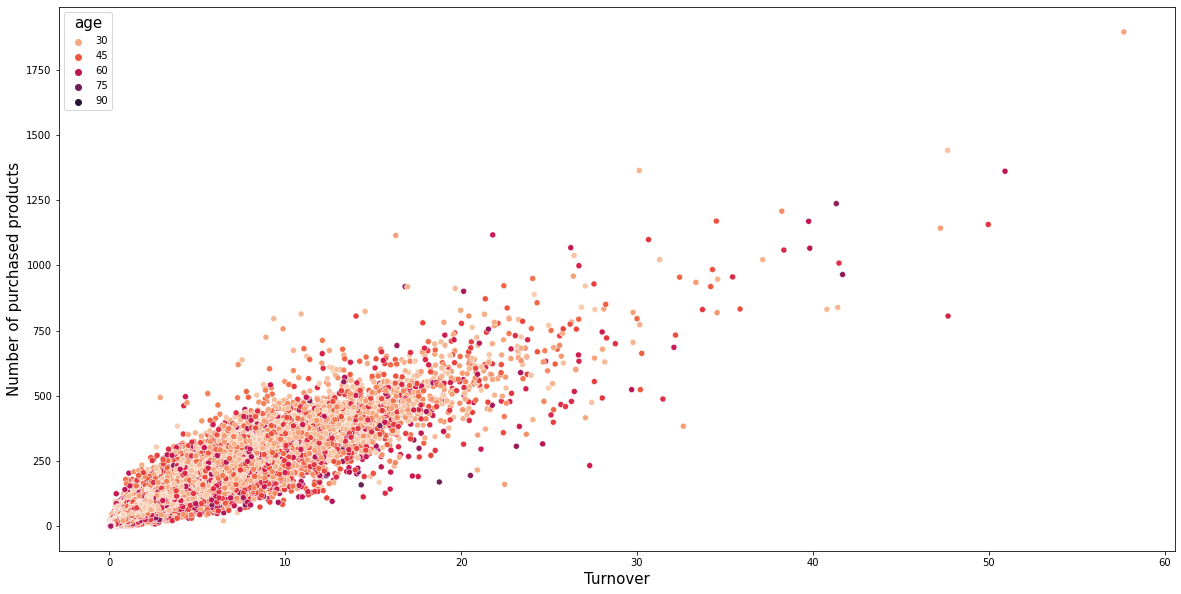

In [18]:
# Plot turnover vs purchased articles per age:
fig = plt.figure(figsize=(20, 10))
palette = sns.color_palette("rocket_r", as_cmap=True)
ax = sns.scatterplot(x='turnover', y='sales_count', hue='age', palette=palette, data=df_cust_master)
# ax.set(xlabel='Turnover', ylabel='Number of purchased products')
ax.set_xlabel("Turnover",fontsize=15)
ax.set_ylabel("Number of purchased products",fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15')


plt.show()

In [21]:
df_wardrobe = pd.read_csv('../data/wardrobe_all.csv', index_col=0)
df_wardrobe['no_articles'] = df_wardrobe.article_id.apply(lambda x: int(len(x)/14))

In [22]:
df_wardrobe.sort_values('no_articles', ascending=False).head()

,customer_id,article_id,no_articles
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,"['0658506001', '0662980002', '0667709001', '06...",1895
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,"['0673186001', '0717205001', '0669713004', '05...",1441
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,"['0568597012', '0588689005', '0573716033', '06...",1364
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,"['0543729003', '0610016001', '0639199001', '05...",1361
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,"['0671783004', '0711547001', '0631270001', '07...",1237


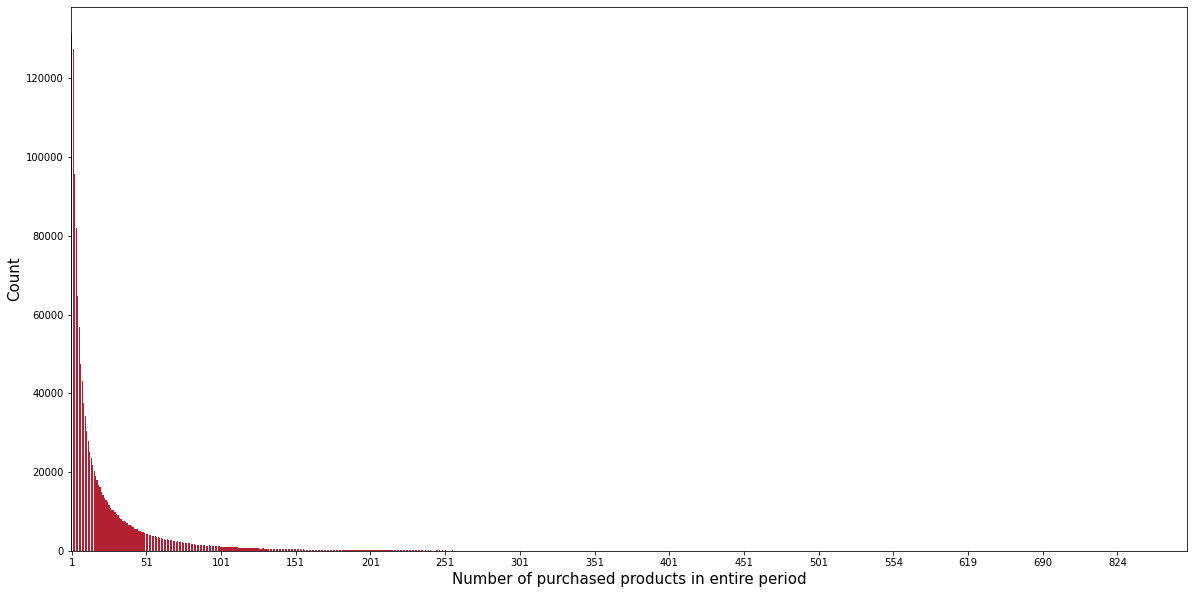

In [25]:
# Plot wardrobe size as countplot
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='no_articles', data=df_wardrobe, palette=['#CC071E'])
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Number of purchased products in entire period",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
# Print only every 5th xtick:
new_ticks = [i.get_text() for i in ax.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 50), new_ticks[::50])
plt.savefig('../images/number-of-pur-products.png')


plt.show()


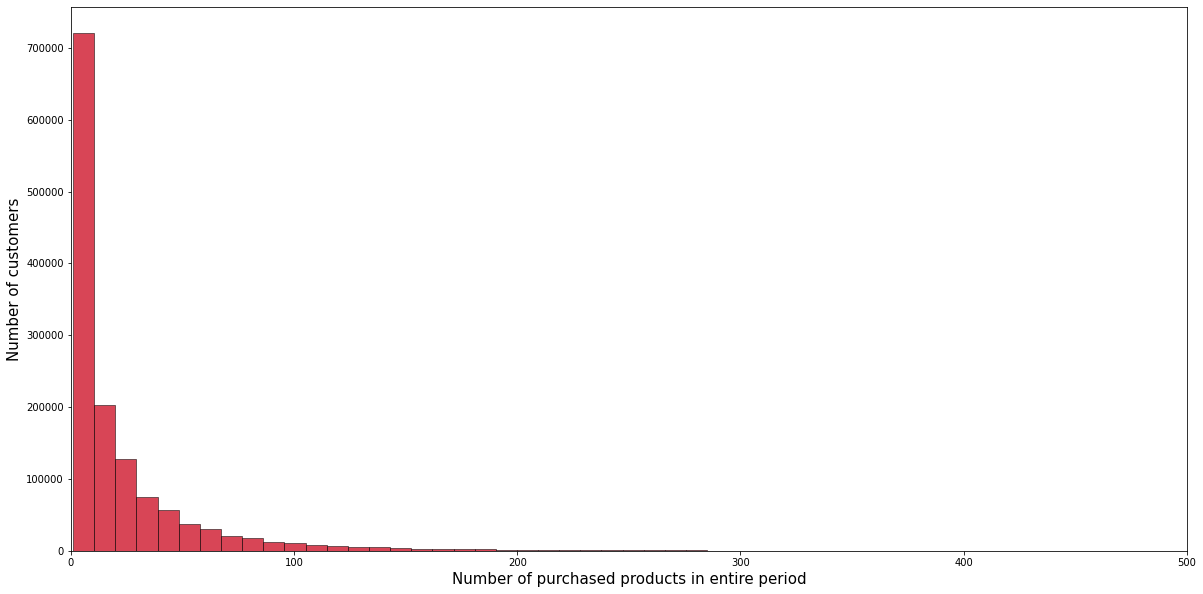

In [38]:
# Plot wardrobe size as histogram
fig = plt.figure(figsize=(20, 10))
ax = sns.histplot(x='no_articles', data=df_wardrobe, palette=['#CC071E'], bins=200)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Number of purchased products in entire period",fontsize=15)
ax.set_ylabel("Number of customers",fontsize=15)
plt.xlim(0, 500)
# Print only every 5th xtick:
# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 50), new_ticks[::50])
# plt.savefig('../images/number-of-pur-products.png')


plt.show()

In [ ]:
df_trans.price.sum()

884645.9740508416

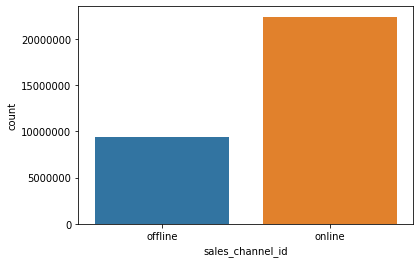

In [9]:
# Plot sales channel (1=offline, 2=online):

channel = ['offline', 'online']

f = sns.countplot('sales_channel_id', data=df_trans)

f.ticklabel_format(style='plain', axis='y')
f.set_xticklabels(channel)

plt.show()


In [10]:
df_trans['datetime'] = pd.to_datetime(df_trans['t_dat'])
df_trans['month_year'] = df_trans['datetime'].dt.strftime('%m/%Y')
df_trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id,datetime,month_year
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.05,2,2018-09-20,09/2018
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.03,2,2018-09-20,09/2018
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.02,2,2018-09-20,09/2018
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.02,2,2018-09-20,09/2018
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.02,2,2018-09-20,09/2018


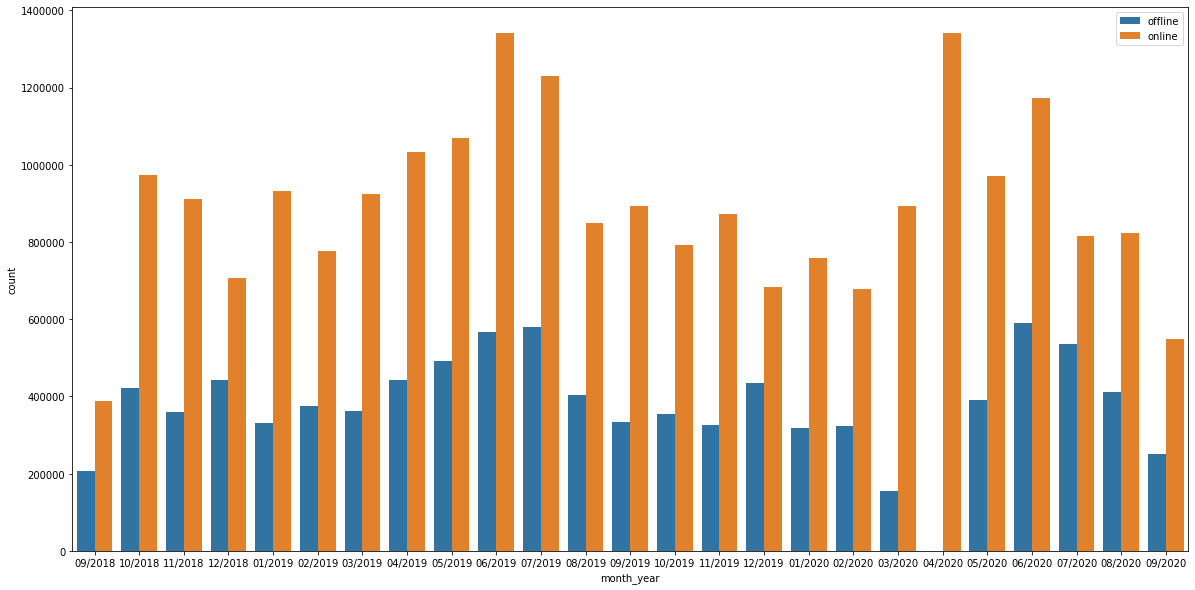

In [11]:
# Plot sales per month and channel (1=offline, 2=online):

plt.figure(figsize=(20, 10))
ax = sns.countplot('month_year', data=df_trans, hue='sales_channel_id')
ax.ticklabel_format(style='plain', axis='y')
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['offline','online'], bbox_to_anchor=(1,1))

plt.show()



In [3]:
# Basketsizes:
from Functions_EDA_CMM import calc_basketsize

df_basketsize = calc_basketsize(df_trans)

In [4]:
df_basketsize.sort_values('basketsize', ascending=False)

,datetime,customer_id,basketsize
330656,2018-10-14,d00063b94dcb1342869d4994844a2742b5d62927f36843...,570
1161741,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,336
1489900,2019-01-13,62fd7d41b587c72a95c31eca5046019ce4e802853397ff...,221
333665,2018-10-15,246734d8f4a4252fcd5c7aa525055a2804b9a6fb3d4210...,220
1869380,2019-02-16,94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d...,199
...,...,...,...
4813838,2019-09-29,f09bca4a7800e662bb3a37bbb254db6f202673c96a3b37...,1
4813839,2019-09-29,f09d27f58b314972e449bfcb21acfbaac15d3019f9363c...,1
4813842,2019-09-29,f0be9568ab2834fd86f5c5b3e8d65006bc926f787d6bea...,1
4813843,2019-09-29,f0c87b16fc5896e9ce5103e7732dc3e99d4aa3096f6b86...,1


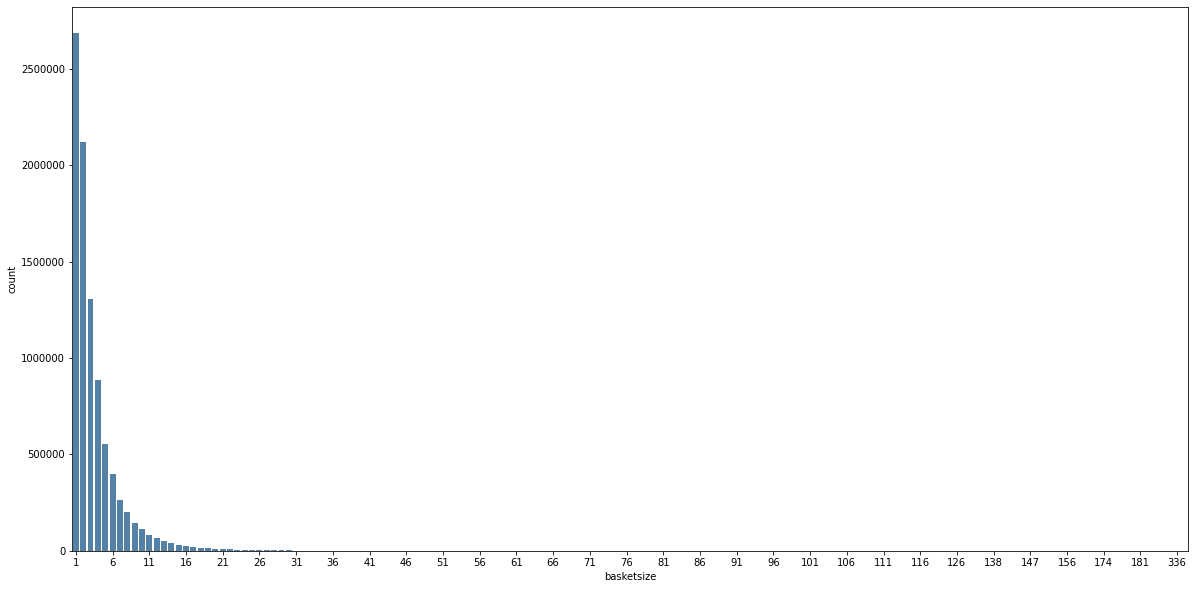

In [21]:
# Plot counts of basketsizes:

plt.figure(figsize=(20, 10))
ax = sns.countplot('basketsize', data=df_basketsize, color="steelblue")
ax.ticklabel_format(style='plain', axis='y')
# Print only every 5th xtick:
new_ticks = [i.get_text() for i in ax.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])


plt.show()

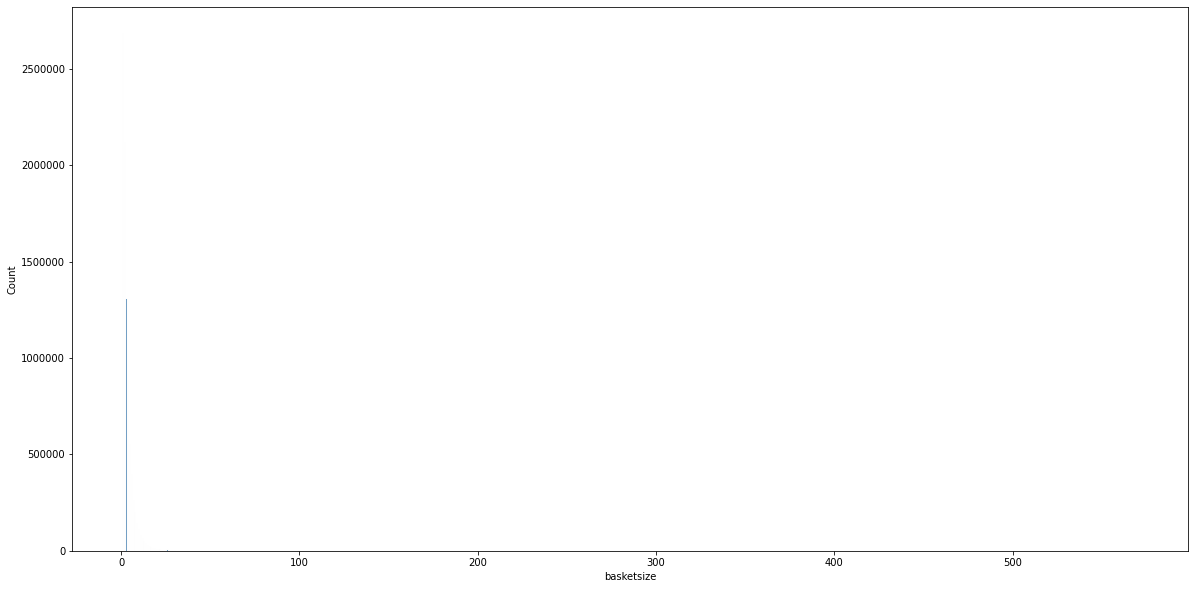

In [18]:
# Plot histogram of basketsizes:

plt.figure(figsize=(20, 10))
ax = sns.histplot(x='basketsize', data=df_basketsize, color="steelblue")
ax.ticklabel_format(style='plain', axis='y')


plt.show()

# 3.0 EDA on article data

In [5]:
df_art = pd.read_csv('../data/articles.csv')

In [6]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [7]:
df_art.index_group_name.value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [31]:
df_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [32]:
df_art.prod_name.value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [33]:
# Create dataframe which includes transactions and article metadata:
# df_trans_detail = pd.merge(df_trans, df_art, on="article_id")


In [34]:
# df_trans_detail.to_csv('../data/transaction_detail.csv')

In [35]:
# df_trans_detail = pd.read_csv('../data/transaction_detail.csv')

In [ ]:
# df_trans_detail.product_group_name.value_counts()

Garment Upper body       12552755
Garment Lower body        7046054
Garment Full body         3552470
Swimwear                  2579222
Underwear                 2565858
Accessories               1599593
Shoes                      745521
Socks & Tights             685712
Nightwear                  348180
Unknown                     97040
Bags                         7313
Items                        5427
Cosmetic                     1500
Underwear/nightwear           559
Furniture                     533
Garment and Shoe care         279
Stationery                    229
Interior textile               74
Fun                             5
Name: product_group_name, dtype: int64

In [8]:
df_trans_detail = pd.read_csv('../data/transaction_detail.csv')

In [12]:
sales_per_cat = df_trans_detail.index_group_name.value_counts().reset_index()
sales_per_cat.rename(columns={'index': 'category', 'index_group_name':'sales'}, inplace=True)

In [13]:
sales_per_cat

,category,sales
0,Ladieswear,20415260
1,Divided,7138254
2,Menswear,1771053
3,Sport,1246408
4,Baby/Children,1217349


In [14]:
sales_per_cat.sales.sum()

31788324

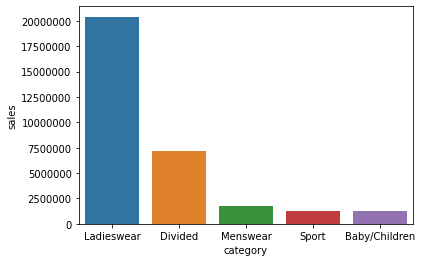

In [23]:
# Plot sales per category:

# plt.figure(figsize=(20, 10))
ax = sns.barplot(x='category', y='sales', data=sales_per_cat)
ax.ticklabel_format(style='plain', axis='y')

plt.show()

# 4.0 Functions for basketsize and number of orders per customer

In [ ]:
# Define function for generating dataframe which calculates basketsizes per order.

def calc_basketsize (purchases):
    """Function to generate dataframe with basketsizes out of dataframe with single purchases (e.g. dataframe from transaction_train.csv). 
    Assumption: Purchases of an individual customer on one day form an order.

    Args:
        purchases (_dataframe_): Dataframe which contains single purchases per customer in each row
    """    
    
    purchases['datetime'] = pd.to_datetime(purchases['t_dat'])

    orderbaskets = purchases.groupby(['datetime', 'customer_id']).size().reset_index()
    orderbaskets.rename(columns={0: "basketsize"}, inplace=True)

    return orderbaskets

In [ ]:
orders = calc_basketsize(df_trans)
orders

,datetime,customer_id,basketsize
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,5
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,5
3,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,2
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,30
...,...,...,...
9080174,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,9
9080175,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,2
9080176,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1
9080177,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1


RESULT: 
* Assumption: Several purchases of an individual customer on one individual day belong to one order.
* There are 9 mio orders in the dataset.

In [ ]:
orders[orders['basketsize'] >= 5]

,datetime,customer_id,basketsize
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,5
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,5
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,30
12,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,11
18,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,5
...,...,...,...
9080158,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,9
9080165,2020-09-22,ff732b98019465f078144bae647d7d9765d76e3431ef92...,6
9080169,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,5
9080172,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,5


RESULT: 
* 2 mio orders have a basketsize of 5 and more articles. 

In [ ]:
orders.customer_id.value_counts()

a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    427
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a    391
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    390
788785852eddb5874f924603105f315d69571b3e5180f3a7ae6970b55b6d5dc9    322
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    318
                                                                   ... 
1e5c27461968413dc9e246d0ab5bbd622e8c77f996d2c3126bfd7c25d75c9c99      1
1e1b74edef5752ee79dddf6e916d179ab8ef7c10638f97183f400d2de4213046      1
1d88ac821f4e41e4876bce377eb66ab5bef032125e9b694d317dd4696f39d14e      1
1d5ce0fc8f983bca9e7f30d12664c0ca08c703c9121f406525d45ed53405349a      1
ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851941508cce49f5dfa469      1
Name: customer_id, Length: 1362281, dtype: int64

In [ ]:
# Define function for generating dataframe which calculates number of orders per customer.

def calc_orders_cust (purchases):
    """Function to generate dataframe with number of orders out of dataframe with single purchases. Assumption: Purchases of an individual customer on one day form an order.

    Args:
        purchases (_dataframe_): Dataframe which contains single purchases per customer in each row
    """    
    
    orderbaskets = purchases.groupby(['datetime', 'customer_id']).size().reset_index()
    orderbaskets.rename(columns={0: "basketsize"}, inplace=True)
    number_orders = orderbaskets.customer_id.value_counts().reset_index()
    number_orders.rename(columns={"index": "customer_id", "customer_id": "number_orders"}, inplace=True)


    return number_orders

In [ ]:
number_orders = calc_orders_cust(df_trans)
number_orders.head(100)

,customer_id,number_orders
0,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,427
1,f137c16fd175271922dad4006565503952f24750a57388...,391
2,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,390
3,788785852eddb5874f924603105f315d69571b3e5180f3...,322
4,e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffcc...,318
...,...,...
95,ece472bcb478824fc4de7786d52f2e72761f584af63339...,171
96,62eb7f6a247863fa029692beaeefdee2c64b1c34c7e865...,171
97,ad3090d52d11671ffb43bfaa85e3620eff669e8c92c911...,170
98,b2c853681dbd7a1c983f0ee048fbee14bca923bbd3e8da...,168
